 **Kelompok 3**
 
 Ahmad Rafi Syaifudin 22031554030

 Achmad Ryvaldy 22031554027
 
 Rihadatul 'Aisy Nur Jannah 22031554028


**Latar Belakang Proyek** 

Filter Suara Pantai: Pengolahan Suara Angin dan Ombak Menggunakan Low Pass Filter dan ISTFT (Inverse Short-Time Fourier Transform)

**Masalah**

Pantai adalah tempat yang indah dengan suara angin dan ombak yang menenangkan. Namun, saat merekam audio di sekitar pantai, seringkali terdapat gangguan suara yang dapat mengaburkan suara asli angin dan ombak tersebut. Gangguan tersebut dapat berasal dari berbagai sumber, seperti suara manusia, lalu lintas, atau peralatan pantai.

Gangguan suara ini menjadi masalah serius bagi para penggemar pantai yang ingin merekam atau memperdengarkan suara alam yang murni dan menenangkan. Oleh karena itu, diperlukan solusi yang dapat membantu menghilangkan atau mengurangi gangguan suara tersebut, sehingga suara angin dan ombak dapat dinikmati dengan lebih baik.

**Urgensi**

Pengembangan filter suara pantai angin dan ombak menggunakan Low Pass Filter dan Inverse Short-Time Fourier Transform (ISTFT) menjadi penting karena beberapa alasan:


1.Kualitas audio: 

Dalam berbagai konteks, seperti produksi musik, film, meditasi, atau aplikasi relaksasi, kualitas audio yang baik sangat penting. Dengan menggunakan filter suara yang efektif, rekaman suara pantai dapat ditingkatkan kualitasnya dengan menghilangkan gangguan suara dan memperkuat suara angin dan ombak yang diinginkan.

2.Kemajuan teknologi: 

Kemajuan dalam pemrosesan sinyal digital dan algoritma pengolahan suara memberikan kesempatan untuk mengembangkan metode yang lebih canggih dalam filterisasi suara pantai. Mengkombinasikan Low Pass Filter dan ISTFT dapat membantu dalam mengurangi gangguan suara yang tidak diinginkan dan memisahkan suara angin dan ombak dari sumber gangguan.

**Tujuan**

Tujuan proyek ini adalah mengembangkan filter suara pantai angin dan ombak menggunakan kombinasi Low Pass Filter dan ISTFT untuk meningkatkan kualitas rekaman suara pantai. Filter ini bertujuan untuk mengurangi atau menghilangkan gangguan suara yang tidak diinginkan, seperti suara manusia, kendaraan, atau peralatan pantai, sehingga menghasilkan rekaman yang lebih jernih dan lebih menyerupai pengalaman nyata di pantai.

Dengan berhasil mengembangkan filter ini, diharapkan rekaman suara pantai dapat digunakan dalam berbagai aplikasi, termasuk produksi musik, film, meditasi, dan aplikasi relaksasi. Filter ini akan membantu mempertahankan keaslian suara alam pantai, memberikan pengalaman yang lebih mendalam bagi pendengar, dan meningkatkan kualitas audio secara keseluruhan.

***FILTER YANG DIGUNAKAN***

**ISTFT (Inverse Short-Time Fourier Transform) adalah kebalikan dari STFT (Short-Time Fourier Transform)** 

ISTFT digunakan untuk merekonstruksi sinyal waktu-domain dari representasi frekuensi-domain yang diperoleh melalui STFT. STFT membagi sinyal audio menjadi segmen-segmen kecil dan menghitung transformasi Fourier untuk setiap segmen. Ini menghasilkan representasi frekuensi-domain dari sinyal audio dalam bentuk spektrogram. ISTFT melakukan langkah-langkah yang berkebalikan untuk mengembalikan sinyal audio dalam domain waktu dari spektrogram.

**Low-pass filter**

Filter Low-Pass adalah jenis filter yang memungkinkan melewatkannya hanya frekuensi yang lebih rendah dari frekuensi cutoff tertentu. Filter ini mengurangi atau menghilangkan komponen frekuensi tinggi dalam sinyal audio, sehingga memungkinkan melewatkannya hanya pada komponen frekuensi yang lebih rendah. Dalam konteks ini, low-pass filter digunakan untuk menghilangkan atau meredam noise frekuensi tinggi dalam sinyal audio, sehingga membantu meningkatkan kualitas sinyal audio dengan fokus pada komponen suara yang lebih penting. Dalam kode yang diberikan, filter low-pass diterapkan menggunakan fungsi butter() dan lfilter() untuk menghilangkan noise frekuensi tinggi sebelum melakukan ISTFT pada sinyal audio.


In [15]:
import numpy as np
import librosa
import soundfile as sf
from scipy.signal import butter, lfilter
from pydub import AudioSegment
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt
from sklearn.decomposition import NMF
import speech_recognition as sr
import numpy as np

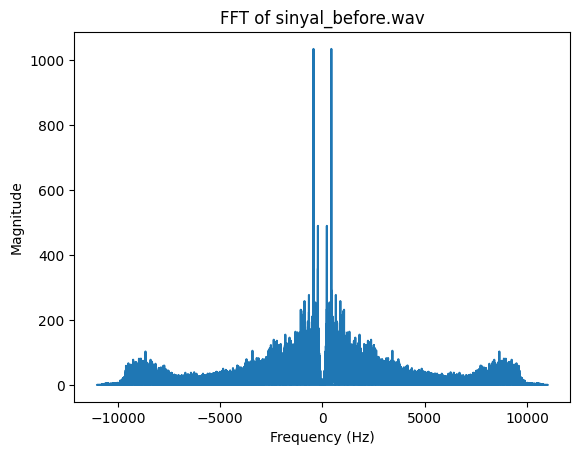

In [4]:
# Load audio file
audio_path = 'sinyal_before.wav'
waveform, sample_rate = librosa.load(audio_path)

# Computasi FFT
fft = np.fft.fft(waveform)

# Computasi  magnitude
magnitude = np.abs(fft)

# Hitung frekuensi yang sesuai dengan komponen FFT
frequencies = np.fft.fftfreq(len(waveform), 1 / sample_rate)

# Plot Hasil FFT
import matplotlib.pyplot as plt

plt.plot(frequencies, magnitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT of sinyal_before.wav')
plt.show()

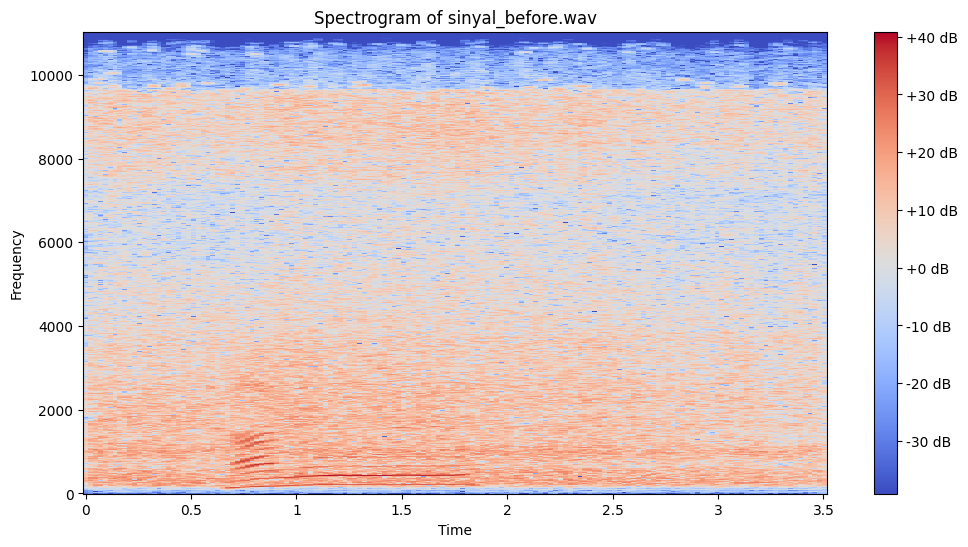

In [5]:
audio_path = 'sinyal_before.wav'
waveform, sample_rate = librosa.load(audio_path)

# Hitung spektrogram
spectrogram = librosa.stft(waveform)
magnitude = librosa.amplitude_to_db(np.abs(spectrogram))

# Display spektogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(magnitude, sr=sample_rate, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of sinyal_before.wav')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

In [6]:
# Load audio file
# Pada command ini, file audio dengan nama 
# 'suarahalo.wav' dimuat menggunakan fungsi librosa.load(). 
# Data audio disimpan dalam variabel waveform, sedangkan nilai 
# frekuensi sampel disimpan dalam sample_rate.
audio_path = 'sinyal_before.wav'
waveform, sample_rate = librosa.load(audio_path)

# Terapkan filter low-pass untuk menghilangkan noise frekuensi tinggi.
cutoff_frequency = 2000  # Sesuaikan frekuensi cutoff sesuai kebutuhan.
normalized_cutoff = cutoff_frequency / (sample_rate / 2)
b, a = butter(1, normalized_cutoff, btype='lowpass')
filtered_waveform = lfilter(b, a, waveform)

# Simpan audio yang sudah jadi
sf.write('sinyal_before_filter_lowpass.wav', filtered_waveform, sample_rate)


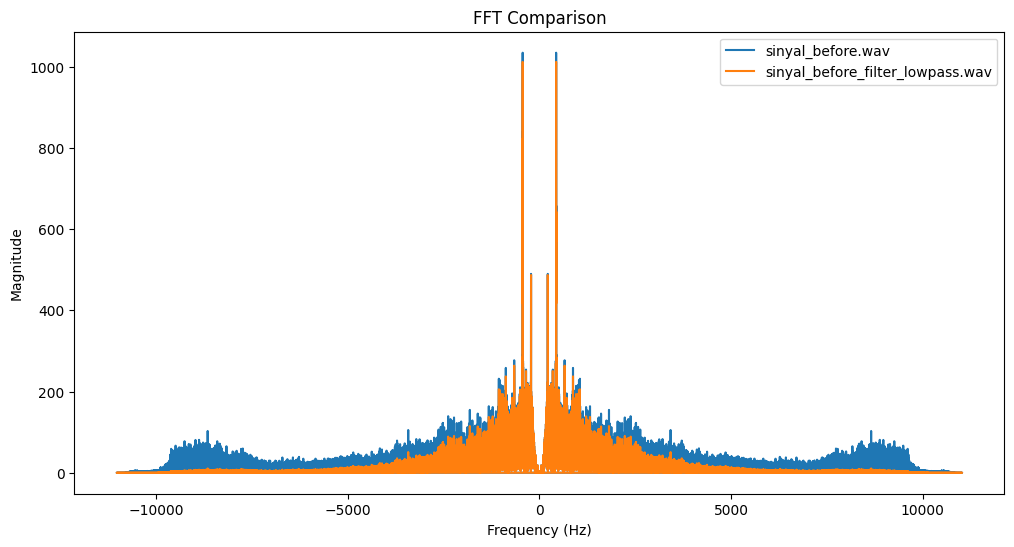

In [7]:
# Load audio files
audio_path1 = 'sinyal_before.wav'
waveform1, sample_rate1 = librosa.load(audio_path1)

audio_path2 = 'sinyal_before_filter_lowpass.wav'
waveform2, sample_rate2 = librosa.load(audio_path2)

# Hitung FFT untuk audio 1
fft1 = np.fft.fft(waveform1)
magnitude1 = np.abs(fft1)

# Hitung FFT untuk audio 2
fft2 = np.fft.fft(waveform2)
magnitude2 = np.abs(fft2)

# Hitung frekuensi yang sesuai dengan komponen FFT
frequencies1 = np.fft.fftfreq(len(waveform1), 1 / sample_rate1)
frequencies2 = np.fft.fftfreq(len(waveform2), 1 / sample_rate2)

# Plot FFT Komparasi
plt.figure(figsize=(12, 6))
plt.plot(frequencies1, magnitude1, label='sinyal_before.wav')
plt.plot(frequencies2, magnitude2, label='sinyal_before_filter_lowpass.wav')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('FFT Comparison')
plt.legend()
plt.show()


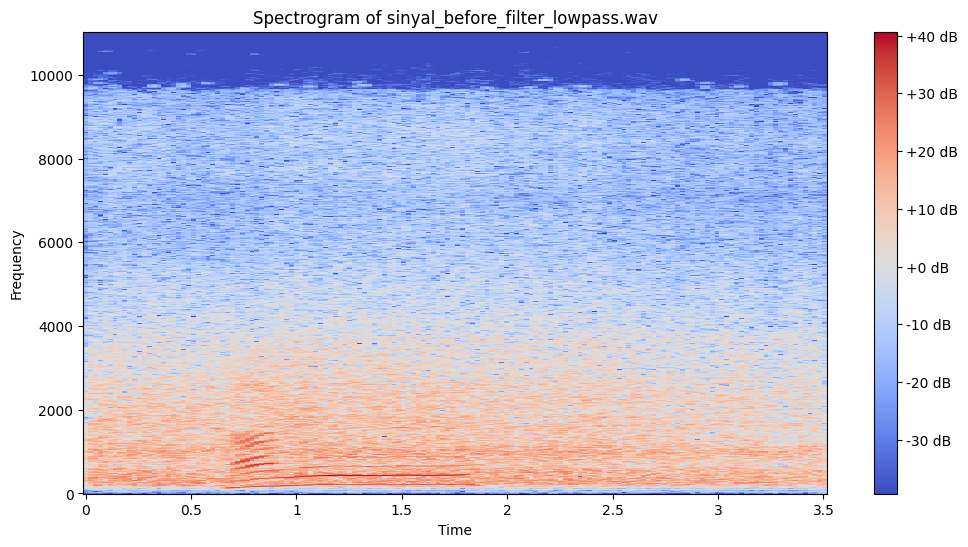

In [8]:
# Load audio file
audio_path = 'Sinyal_before_filter_lowpass.wav'
waveform, sample_rate = librosa.load(audio_path)

# Hitung spektrogram
spectrogram = librosa.stft(waveform)
magnitude = librosa.amplitude_to_db(np.abs(spectrogram))

# Display spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(magnitude, sr=sample_rate, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of sinyal_before_filter_lowpass.wav')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()


Pemisahan suara dan noise menggunakan SNR (Signal-to-Noise Ratio):
Setelah memuat file audio suara dan file audio noise, perhitungan spektrogram daya dilakukan pada langkah-langkah berikutnya. Perhitungan SNR ratio digunakan untuk memisahkan komponen suara dari noise. Rasio tersebut digunakan sebagai acuan untuk memutuskan apakah suatu frekuensi dianggap suara atau noise. Dalam hal ini, rasio SNR di atas 3.0 dianggap sebagai suara, sedangkan di bawahnya dianggap sebagai noise.

In [9]:
# Load audio files:
# Kode ini menggunakan library librosa untuk memuat file audio. 
# File halofilter_lowpass.wav merupakan file suara yang akan ditingkatkan, 
# sedangkan suarahalo.wav adalah file yang berisi noise yang ingin dipisahkan dari suara.

speech, sr = librosa.load('sinyal_before_filter_lowpass.wav')
noise, _ = librosa.load('sinyal_before.wav', sr=sr)

# Menghitung spektrogram daya dari suara dan noise:
# Pada langkah ini, menggunakan transformasi Fourier cepat (STFT) dari library librosa untuk
# menghitung spektrogram daya dari sinyal suara dan noise. Nilai absolut dari STFT digunakan 
# untuk menghitung daya spektral, dan hasilnya dikuadratkan untuk mendapatkan spektrogram daya.
speech_power = np.abs(librosa.stft(speech)) ** 2
noise_power = np.abs(librosa.stft(noise)) ** 2

# Mengestimasi spektrogram daya dari noise:
# Dalam langkah ini, rata-rata daya spektral dari noise dihitung untuk setiap frekuensi.
# Rata-rata ini kemudian digunakan untuk menghasilkan spektrogram daya dari noise dengan 
# ukuran yang sama dengan spektrogram daya suara.

noise_mean = np.mean(noise_power, axis=1)
noise_power = np.tile(noise_mean, (speech_power.shape[1], 1)).T

# Menghitung rasio antara daya suara dan daya noise (SNR ratio):
# Langkah ini menghitung rasio antara daya spektral suara dan daya spektral noise pada setiap frekuensi.
# Rasio ini akan digunakan untuk mengambil keputusan apakah frekuensi tersebut termasuk suara atau noise.
snr_ratio = speech_power / noise_power

# Menerapkan threshold untuk memasker noise:
# Dalam langkah ini, threshold diterapkan pada SNR ratio. 
# Jika SNR ratio melebihi atau sama dengan 3.0, maka frekuensi tersebut akan dianggap sebagai suara dan akan dimasker.
mask = snr_ratio >= 3.0

# Menerapkan mask pada spektrogram daya suara:j
# Mask yang telah dihitung sebelumnya diterapkan pada spektrogram daya suara. 
# Bagian spektrogram yang termasker (dianggap sebagai noise) akan dikalikan dengan nol, 
# sedangkan bagian suara yang terlepas dari mask akan tetap sama.
enhanced_speech_power = speech_power * mask

# Merekonstruksi sinyal suara yang telah ditingkatkan:
# Dalam langkah ini, spektrogram daya suara yang telah ditingkatkan dikalikan dengan akar kuadratnya, 
# kemudian dikalikan dengan eksponensial dari sudut fasa spektrogram asli. Proses ini bertujuan untuk 
# mengembalikan sinyal suara yang telah ditingkatkan ke dalam domain waktu.
enhanced_speech = librosa.istft(np.sqrt(enhanced_speech_power) * np.exp(1j * np.angle(librosa.stft(speech))))
 
# Save sound yang sudah jadi
sf.write('suarasnrpass.wav', enhanced_speech, sr)


Pada langkah kode yang diberikan sebelumnya, terdapat beberapa langkah yang melibatkan masker pada spektrogram daya:

mask = snr_ratio >= 3.0

enhanced_speech_power = speech_power * mask

Pada langkah pertama, sebuah threshold atau ambang batas diterapkan pada rasio antara daya suara (speech power) dan daya noise (noise power). Dalam kasus ini, ambang batas yang digunakan adalah 3.0. Tujuannya adalah untuk memisahkan komponen suara dari komponen noise dengan menggunakan rasio SNR (Signal-to-Noise Ratio). Rasio SNR yang melebihi ambang batas akan dianggap sebagai komponen suara, sedangkan yang di bawah ambang batas akan dianggap sebagai komponen noise.

Pada langkah kedua, mask atau masker tersebut diterapkan pada spektrogram daya sinyal suara yang telah ditingkatkan. Masker ini berfungsi untuk menghilangkan atau meredam komponen noise pada spektrogram daya tersebut dengan mengalikan spektrogram daya dengan masker yang telah dihitung sebelumnya.

Dengan menggunakan masker ini pada spektrogram daya, ketika dilakukan transformasi ISTFT pada spektrogram tersebut, komponen noise yang telah di-mask akan ditekan dalam sinyal waktu-domain yang direkonstruksi, sementara komponen suara yang ada di dalam masker akan diberikan penekanan yang lebih besar.

Penerapan masker pada spektrogram daya merupakan salah satu teknik dalam pengolahan sinyal audio untuk mengurangi kehadiran noise dan meningkatkan kualitas sinyal suara yang dihasilkan.

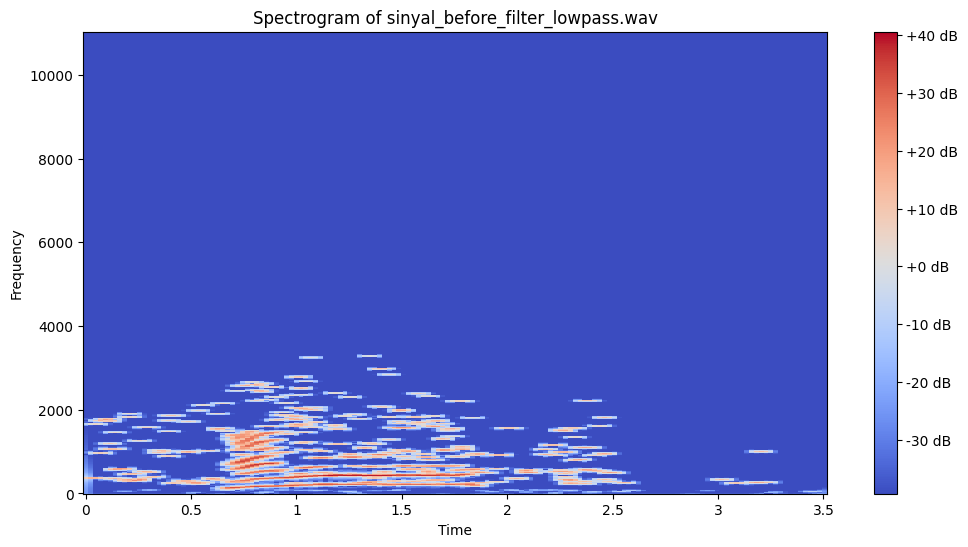

In [10]:
# Load audio file
audio_path = 'suarasnrpass.wav'
waveform, sample_rate = librosa.load(audio_path)

# Compute the spectrogram
spectrogram = librosa.stft(waveform)
magnitude = librosa.amplitude_to_db(np.abs(spectrogram))

# Display the spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(magnitude, sr=sample_rate, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of sinyal_before_filter_lowpass.wav')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

In [46]:
# Load audio files:
# Kode ini menggunakan library librosa untuk memuat file audio. 
# File halofilter_lowpass.wav merupakan file suara yang akan ditingkatkan, 
# sedangkan suarahalo.wav adalah file yang berisi noise yang ingin dipisahkan dari suara.
enhanced_speech, sr = librosa.load('suarasnrpass.wav')
noise, _ = librosa.load('sinyal_before.wav', sr=sr)

# Menghitung spektrogram daya dari suara dan noise:
# Pada langkah ini, menggunakan transformasi Fourier cepat (STFT) dari library librosa untuk
# menghitung spektrogram daya dari sinyal suara dan noise. Nilai absolut dari STFT digunakan 
# untuk menghitung daya spektral, dan hasilnya dikuadratkan untuk mendapatkan spektrogram daya.
speech_power = np.abs(librosa.stft(enhanced_speech)) ** 2
noise_power = np.abs(librosa.stft(noise)) ** 2

# Mengestimasi spektrogram daya dari noise:
# Dalam langkah ini, rata-rata daya spektral dari noise dihitung untuk setiap frekuensi.
# Rata-rata ini kemudian digunakan untuk menghasilkan spektrogram daya dari noise dengan 
# ukuran yang sama dengan spektrogram daya suara.
noise_mean = np.mean(noise_power, axis=1)
noise_power = np.tile(noise_mean, (speech_power.shape[1], 1)).T

# Menghitung spektrogram daya dari suara dan noise:
# Pada langkah ini, menggunakan transformasi Fourier cepat (STFT) dari library librosa untuk
# menghitung spektrogram daya dari sinyal suara dan noise. Nilai absolut dari STFT digunakan 
# untuk menghitung daya spektral, dan hasilnya dikuadratkan untuk mendapatkan spektrogram daya.
snr_ratio = speech_power / noise_power

# Menghitung rasio antara daya suara dan daya noise (SNR ratio):
# Langkah ini menghitung rasio antara daya spektral suara dan daya spektral noise pada setiap frekuensi.
# Rasio ini akan digunakan untuk mengambil keputusan apakah frekuensi tersebut termasuk suara atau noise.
mask = snr_ratio >= 3.0

# Menerapkan threshold untuk memasker noise:
# Dalam langkah ini, threshold diterapkan pada SNR ratio. 
# Jika SNR ratio melebihi atau sama dengan 3.0, maka frekuensi tersebut akan dianggap sebagai suara dan akan dimasker.
enhanced_speech_power = speech_power * mask

# Mengubah spektrogram daya suara yang telah ditingkatkan:
# Langkah ini mengubah spektrogram daya suara yang telah ditingkatkan 
# dengan memperkuat komponen suara dan meredam komponen noise. Parameter 
# alpha digunakan untuk mengontrol sejauh mana penekanan pada komponen suara.
alpha = 1.2 # Sesuaikan parameter untuk mengendalikan penekanan pada suara
enhanced_speech_power = enhanced_speech_power ** alpha

# Merekonstruksi sinyal suara yang telah ditingkatkan:
# Dalam langkah ini, spektrogram daya suara yang telah ditingkatkan dikalikan dengan akar kuadratnya, 
# kemudian dikalikan dengan eksponensial dari sudut fasa spektrogram asli. Proses ini bertujuan untuk 
# mengembalikan sinyal suara yang telah ditingkatkan ke dalam domain waktu.
enhanced_speech = librosa.istft(np.sqrt(enhanced_speech_power) * np.exp(1j * np.angle(librosa.stft(enhanced_speech))))

# Save sound yang sudah jadi
sf.write('sinyal_after.wav', enhanced_speech, sr)


In [49]:
import speech_recognition as sr

# Mendefinisikan nama file WAV berbahasa Indonesia yang ingin diimpor
file_wav = "sinyal_after.wav"

# Membaca file WAV dan melakukan deteksi serta identifikasi suara
def transcribe_speech(file_wav):
    r = sr.Recognizer()
    with sr.AudioFile(file_wav) as source:
        # Mengurangi noise latar belakang
        r.adjust_for_ambient_noise(source)
        audio = r.record(source)
    
    # Menggunakan Google Cloud Speech-to-Text API untuk mendapatkan teks dari audio
    try:
        # Menggunakan library SpeechRecognition dengan model DeepSpeech
        hasil = r.recognize_google(audio, language="id-ID", show_all=False)
        return hasil
    except sr.UnknownValueError:
        return None
    except sr.RequestError:
        return None

# Menggunakan fungsi transcribe_speech untuk mendapatkan teks dari audio
hasil = transcribe_speech(file_wav)

if hasil is not None:
    print("Hasil transkripsi: " + hasil)
else:
    print("Tidak dapat mengenali suara")


Tidak dapat mengenali suara


**SUARA TIDAK DIKENALI, KARENA INTONASI NADA DARI SUARA HALO TIDAK STABIL PADA TIME  SPECTOGRAM 0,5 Detik HINGGA 1 Detik dan SUARA PADA DETIK 1 HINGGA 1.7 HANYA TERDENGAR "ALO"**

====================================================================================================================================

Di sinilah "ISTFT alpha" diterapkan. Setelah melakukan transformasi ISTFT untuk merekonstruksi sinyal suara dari spektrogram daya yang telah ditingkatkan sebelumnya, nilai spektrogram daya tersebut ditingkatkan kembali dengan mengalikan dengan pangkat alpha.

Parameter alpha digunakan untuk mengontrol sejauh mana penekanan pada komponen suara dalam proses ini. Dengan meningkatkan nilai alpha, komponen suara akan diberikan penekanan yang lebih besar, sehingga menjadi lebih menonjol dan meredam lebih banyak komponen noise. Sebaliknya, dengan nilai alpha yang lebih rendah, penekanan pada komponen suara akan lebih sedikit, sehingga mempertahankan kehadiran komponen noise.

Dalam praktiknya, Anda dapat mengubah nilai alpha sesuai dengan preferensi atau kebutuhan Anda dalam memperkuat atau menekankan suara dalam rekonstruksi sinyal suara yang ditingkatkan. Eksperimen dengan berbagai nilai alpha dapat membantu Anda menemukan pengaturan yang sesuai untuk mengoptimalkan hasil penekanan suara dalam proses tersebut.

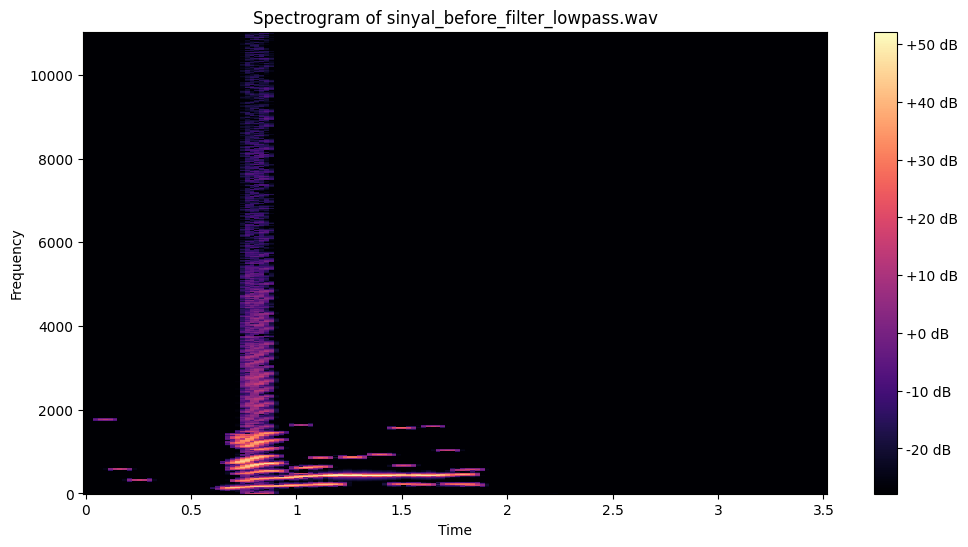

In [16]:
# Load audio file
audio_path = 'sinyal_after.wav'
waveform, sample_rate = librosa.load(audio_path)

# Compute the spectrogram
spectrogram = librosa.stft(waveform)
magnitude = librosa.amplitude_to_db(np.abs(spectrogram))

# Display the spectrogram
plt.figure(figsize=(12, 6))
librosa.display.specshow(magnitude, sr=sample_rate, x_axis='time', y_axis='linear')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of sinyal_before_filter_lowpass.wav')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

**HASIL DARI SEMUA GRAF**

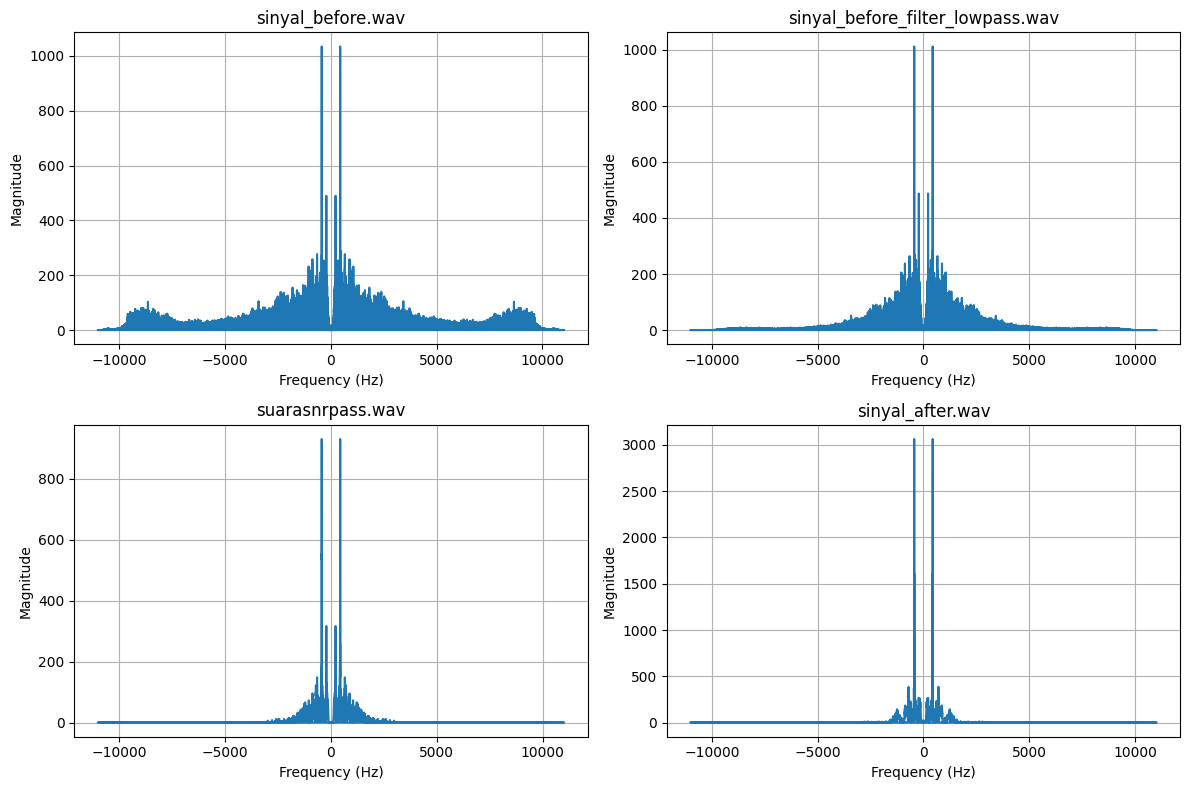

In [12]:
# List of audio files
audio_files = ['sinyal_before.wav', 'sinyal_before_filter_lowpass.wav', 'suarasnrpass.wav', 'sinyal_after.wav']

# Compute and plot FFT for each audio file
plt.figure(figsize=(12, 8))

for i, audio_file in enumerate(audio_files):
    # Load audio file
    waveform, sample_rate = librosa.load(audio_file)
    
    # Compute FFT
    fft = np.fft.fft(waveform)
    magnitude = np.abs(fft)
    frequencies = np.fft.fftfreq(len(waveform), 1 / sample_rate)
    
    # Plot FFT
    plt.subplot(2, 2, i+1)
    plt.plot(frequencies, magnitude)
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.title(audio_file)
    plt.grid()

plt.tight_layout()
plt.show()

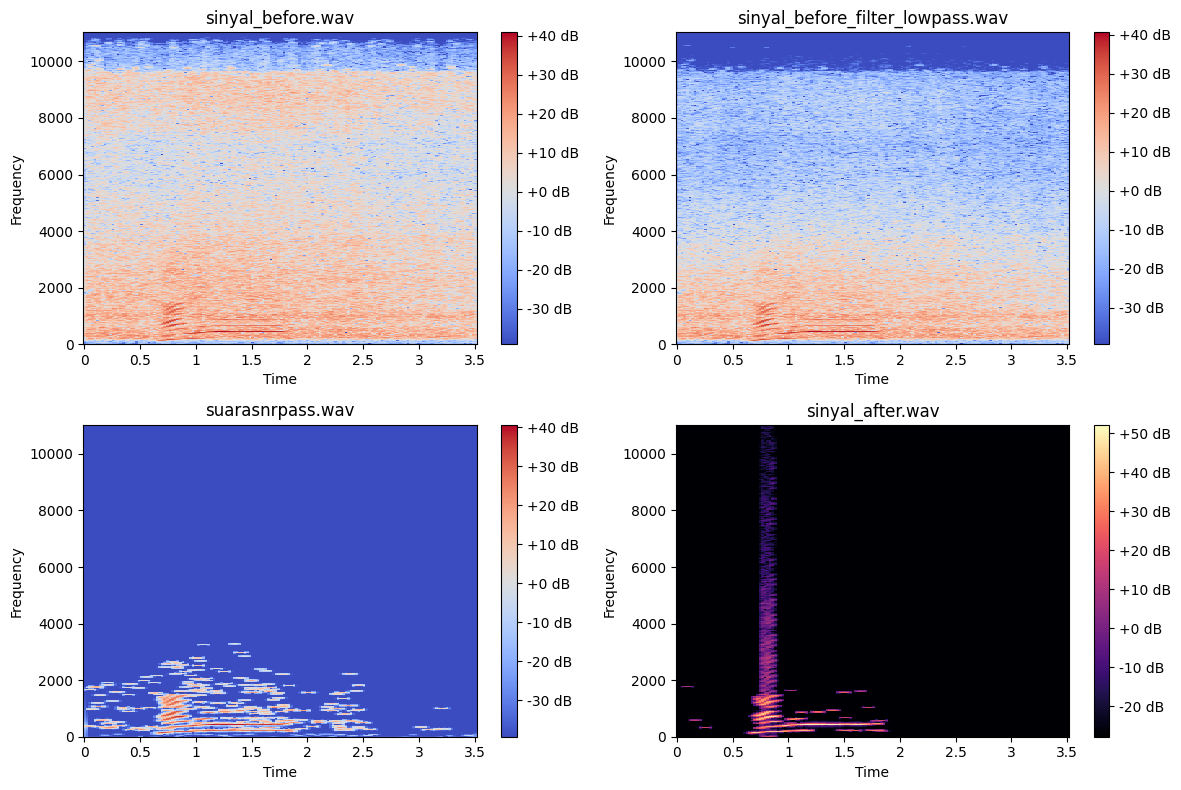

In [13]:
# List of audio files
audio_files = ['sinyal_before.wav', 'sinyal_before_filter_lowpass.wav', 'suarasnrpass.wav', 'sinyal_after.wav']

# Plot the spectrogram for each audio file
plt.figure(figsize=(12, 8))

for i, audio_file in enumerate(audio_files):
    # Load audio file
    waveform, sample_rate = librosa.load(audio_file)
    
    # Compute the spectrogram
    spectrogram = librosa.stft(waveform)
    magnitude = librosa.amplitude_to_db(np.abs(spectrogram))
    
    # Plot the spectrogram
    plt.subplot(2, 2, i+1)
    librosa.display.specshow(magnitude, sr=sample_rate, x_axis='time', y_axis='linear')
    plt.colorbar(format='%+2.0f dB')
    plt.title(audio_file)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    
plt.tight_layout()
plt.show()